<a href="https://colab.research.google.com/github/Jmmostafa/DerivativePricing/blob/main/DP001_BS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Derivative Pricing - Options**

|  |  |
|:---|:---|
|**Developed By** |  Md Mostafa Kamal |
|**Date** | August 23, 2025  |
|**Covered** | Options Pricing -BS model, Application |
|**Sequence** | DP001 |


---

# **Introduction**

In this notebook, I explore the **Black–Scholes (BS) model**, a cornerstone of modern financial theory used for pricing European-style options. The BS model provides a closed-form solution for option prices based on key factors such as the underlying asset price, strike price, time to maturity, risk-free interest rate, and volatility.

I also calculate the **option Greeks**, which are sensitivity measures that describe how option prices respond to changes in market parameters. These include **Delta, Gamma, Vega, Theta, Rho**, as well as higher-order Greeks like **Vanna, Volga, and Charm**. Understanding these Greeks is essential for **risk management, hedging strategies, and portfolio optimization** in options trading.  

Using **Python**, I will:
1. Fetch real-world option data for a given stock using `yfinance`.
2. Implement the Black–Scholes formula for both call and put options.
3. Compute all major and higher-order Greeks.
4. Visualize option prices and Greeks across strikes to better understand market dynamics and sensitivities.

This notebook serves as both a **practical guide** to option pricing with Python and a **reference** for quantitative finance concepts.

# **Mathematical Framework for BS Model**

- **Purpose**: Prices European options.

## **Call Option Price**
$$
C(S_t, t) = S_tN(d_1) - Ke^{-r(T-t)}N(d_2)
$$

## **Put Option Price**
$$
P(S_t, t) = Ke^{-r(T-t)}N(-d_2) - S_tN(-d_1)
$$

$$
d_1 = \frac{\ln\left(\frac{S_t}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)(T-t)}{\sigma\sqrt{T-t}}
$$
$$
d_2 = d_1 - \sigma\sqrt{T-t} = \frac{\ln\left(\frac{S_t}{K}\right) + \left(r - \frac{\sigma^2}{2}\right)(T-t)}{\sigma\sqrt{T-t}}
$$

### **Variables:**
| Symbol | Description |
|--------|-------------|
| $S_t$  | Current underlying asset price |
| $K$    | Strike price |
| $T$    | Time to maturity (in years) |
| $t$    | Current time (typically 0) |
| $r$    | Risk-free interest rate (continuous compounding) |
| $\sigma$ | Volatility of returns |
| $N(\cdot)$ | Cumulative standard normal distribution function |

## **Key Assumptions**
- No dividends paid during option life
- No arbitrage opportunities
- Constant risk-free rate and volatility
- Lognormal distribution of underlying returns
- No transaction costs or taxes
- Continuous trading


# Options Greeks
- $S$ = Spot price  
- $K$ = Strike price  
- $T$ = Time to maturity (in years)  
- $r$ = Risk-free interest rate  
- $q$ = Continuous dividend yield  
- $\sigma$ = Volatility  
- $d_1 = \frac{\ln\left(\frac{S}{K}\right) + (r - q + \frac{\sigma^2}{2})T}{\sigma \sqrt{T}}$  
- $d_2 = d_1 - \sigma \sqrt{T}$  
- $N(x)$ = Cumulative distribution function of the standard normal distribution  
- $n(x)$ = Probability density function of the standard normal distribution  

---

### 1. Delta
Measures sensitivity of option price to changes in the underlying price.
- **Call**:  
  $\Delta_C = e^{-qT} N(d_1)$  
- **Put**:  
  $\Delta_P = e^{-qT} \left[ N(d_1) - 1 \right]$

---

### 2. Gamma
Measures the rate of change of Delta with respect to the underlying price.
$$
\Gamma = \frac{e^{-qT} n(d_1)}{S \sigma \sqrt{T}}
$$

---

### 3. Vega
Measures sensitivity of option price to changes in volatility.
$$
\text{Vega} = S e^{-qT} n(d_1) \sqrt{T}
$$

---

### 4. Theta
Measures sensitivity of option price to the passage of time.
- **Call**:  
  $$
  \Theta_C = -\frac{S e^{-qT} n(d_1) \sigma}{2\sqrt{T}} - rK e^{-rT} N(d_2) + q S e^{-qT} N(d_1)
  $$
- **Put**:  
  $$
  \Theta_P = -\frac{S e^{-qT} n(d_1) \sigma}{2\sqrt{T}} + rK e^{-rT} N(-d_2) - q S e^{-qT} N(-d_1)
  $$

---

### 5. Rho
Measures sensitivity of option price to changes in interest rate.
- **Call**:  
  $$
  \rho_C = K T e^{-rT} N(d_2)
  $$
- **Put**:  
  $$
  \rho_P = -K T e^{-rT} N(-d_2)
  $$

---

### 6. Vanna
Measures sensitivity of Delta to changes in volatility (or Vega to changes in spot price).
$$
\text{Vanna} = - e^{-qT} n(d_1) \frac{d_2}{\sigma}
$$

---

### 7. Volga (a.k.a. Vomma)
Measures sensitivity of Vega to changes in volatility.
$$
\text{Volga} = \text{Vega} \cdot \frac{d_1 d_2}{\sigma}
$$

---

### 8. Charm
Measures sensitivity of Delta to the passage of time.
$$
\text{Charm} = q e^{-qT} N(d_1) - e^{-qT} n(d_1) \cdot \frac{2(r - q)T - d_2 \sigma \sqrt{T}}{2T \sigma \sqrt{T}}
$$


# **Application: BS Model and Greeks**

In [150]:
!pip install yfinance numpy scipy matplotlib scienceplots --quiet
!apt-get update -qq
!apt-get install -y texlive-latex-extra texlive-fonts-recommended dvipng cm-super --quiet


# For latex text in the graphs
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists...
Building dependency tree...
Reading state information...
cm-super is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


## Functions

In [151]:
import numpy as np
import pandas as pd
from scipy.stats import norm

class Black_Scholes:
    def __init__(self, S0, K, r, sigma, T, type):
        self.S0 = S0
        self.K = K
        self.r = r
        self.sigma = sigma
        self.T = T
        self.type = type

    def BS_Model(self):
        d1 = (np.log(self.S0/self.K) + ((self.r + 0.5 * self.sigma ** 2) * self.T))/(self.sigma * np.sqrt(self.T))
        d2 = d1 - (self.sigma * np.sqrt(self.T))

        if self.type == 'C':
            return self.S0 * norm.cdf(d1) - self.K * np.exp(- self.r * self.T) * norm.cdf(d2)

        else:
            return self.K * np.exp(- self.r * self.T) * norm.cdf(-d2) - self.S0 * norm.cdf(-d1)


    def option_greeks(self):
        d1 = (np.log(self.S0/self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T)/(self.sigma * np.sqrt(self.T))
        d2 = d1 - (self.sigma * np.sqrt(self.T))

        if self.type =='C':
            delta = norm.cdf(d1)
            gamma = norm.pdf(d1)/(self.S0 * self.sigma * np.sqrt(self.T))
            vega = self.S0 * norm.pdf(d1) * np.sqrt(self.T)
            theta = - (self.S0 * self.sigma * norm.pdf(d1))/(2 * np.sqrt(self.T)) \
                    - (self.r * self.K * np.exp(- self.r * self.T) * norm.cdf(d2))
            rho = self.K * self.T * np.exp( - self.r * self.T) * norm.cdf(d2)
            vanna = - (norm.pdf(d1) * d2) / self.sigma
            volga = (vega * d1 * d2 )/ self.sigma
            charm = - norm.pdf(d1) * (((2 * self.r * self.T) - (d2 * self.sigma * np.sqrt(self.T)))/ \
                    (2 * self.T * self.sigma * np.sqrt(self.T)))

        else:
            delta = norm.cdf(d1) - 1
            gamma = norm.pdf(d1)/(self.S0 * self.sigma * np.sqrt(self.T))
            vega = self.S0 * np.sqrt(self.T) * norm.pdf(d1)
            theta = - (self.S0 * norm.pdf(d1) * self.sigma)/(2 * np.sqrt(self.T)) \
                    + self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(-d2)
            rho = - self.K * self.T * np.exp(-self.r * self.T) * norm.cdf(-d2)
            vanna = - (norm.pdf(d1) * d2)/self.sigma
            volga = (vega * d1 * d2) / self.sigma
            charm = - norm.pdf(d1) * ((2 * self.r * self.T + d2 * self.sigma * np.sqrt(self.T))/\
                                     2 * self.T * self.sigma * np.sqrt(self.T))

        return {
            'Delta': round(delta, 4),
            'Gamma': round(gamma, 4),
            'Vega': round(vega, 4),
            'Theta': round(theta, 4),
            'Rho': round(rho, 4),
            'Vanna': round(vanna, 4),
            'Volga': round(volga, 4),
            'Charm': round(charm, 4)
        }

## Toy Model

In [152]:
# Let's see the results of the model
option_results_c = []
option_results_p = []
strikes = np.arange(75, 125, 5)

for strike in strikes:
  model_c = Black_Scholes(S0 = 100, K = strike, r = 0.05, sigma = 0.25, T = 1, type = 'C')
  model_p = Black_Scholes(S0 = 100, K = strike, r = 0.05, sigma = 0.25, T = 1, type = 'P')
  prices_c = model_c.BS_Model()
  prices_p = model_p.BS_Model()
  greeks_c = model_c.option_greeks()
  greeks_p = model_p.option_greeks()

  row_c = {'Strike': strike, 'Call Price': round(prices_c, 2)}
  row_c.update(greeks_c)
  option_results_c.append(row_c)

  row_p = {'Strike': strike, 'Put Price': round(prices_p, 2)}
  row_p.update(greeks_p)
  option_results_p.append(row_p)

df_c = pd.DataFrame(option_results_c)
df_c.set_index('Strike', inplace=True)

df_p = pd.DataFrame(option_results_p)
df_p.set_index('Strike', inplace=True)

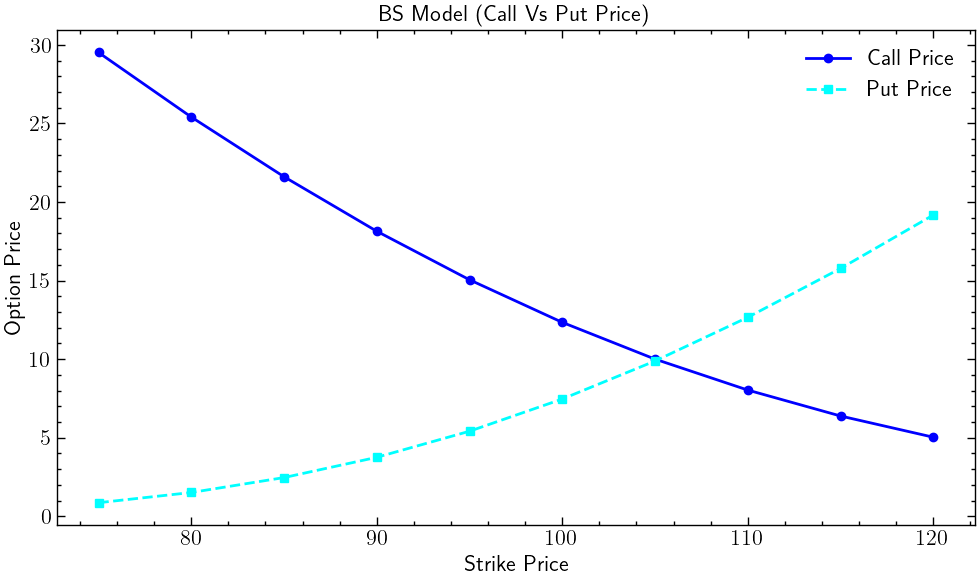

In [153]:
import scienceplots
import matplotlib.pyplot as plt

plt.style.use(['science', 'notebook', 'grid'])
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(10,6))
plt.plot(df_c.index, df_c['Call Price'], 'o-', label='Call Price', color='blue')
plt.plot(df_p.index, df_p['Put Price'], 's--', label='Put Price', color='cyan')
plt.xlabel('Strike Price')
plt.ylabel('Option Price')
plt.title("BS Model (Call Vs Put Price)")
plt.legend(frameon = False)
plt.grid(False)
plt.tight_layout()
plt.show()

## Real-Option Data

In [154]:
from datetime import datetime

def time_to_expiry(expiry):
    expiry_date = datetime.strptime(expiry, "%Y-%m-%d")
    today = datetime.today()
    T = (expiry_date - today).days / 365   # in years
    return max(T, 0)


In [155]:
import yfinance as yf
from datetime import datetime

def get_option_chain(ticker):
    """Fetch current option chain for a ticker"""
    stock = yf.Ticker(ticker)

    # Get current price
    S = stock.history(period="1d")['Close'].iloc[-1]
    print(f"Current {ticker} price: ${S:.2f}")

    # Get nearest expiration (option expires in next 6 months)
    expirations = stock.options
    nearest_expiry = expirations[11]
    print(f"Nearest expiration: {nearest_expiry}")

    # Get option chain
    chain = stock.option_chain(nearest_expiry)
    calls = chain.calls
    puts = chain.puts

    return calls, puts, S, nearest_expiry


# tickers chosen for the options data
ticker = "AAPL"
calls, puts, S, expiry = get_option_chain(ticker)

# Show some calls
calls[['strike', 'lastPrice', 'impliedVolatility']].tail()

Current AAPL price: $227.76
Nearest expiration: 2026-04-17


,strike,lastPrice,impliedVolatility
20,310.0,1.01,0.237068
21,315.0,0.93,0.238045
22,320.0,1.03,0.238167
23,325.0,0.65,0.240120
24,330.0,0.56,0.243050


In [156]:
# Calculating the Prices and sensitivites

r = 0.0437
T = time_to_expiry(expiry)

results = []

for i, row in calls.iterrows():
    K = row['strike']
    sigma = row['impliedVolatility']
    market_price = row['lastPrice']

    # Initialize Black–Scholes
    bs = Black_Scholes(S0=S, K=K, r=r, sigma=sigma, T=T, type='C')

    # Calculate model price & greeks
    model_price = bs.BS_Model()
    greeks = bs.option_greeks()

    results.append({
        "Strike": K,
        "MarketPrice": market_price,
        "BS_Price": round(model_price, 2),
        "IV": round(sigma, 4),
        **greeks
    })

df = pd.DataFrame(results)
df.head()


,Strike,MarketPrice,BS_Price,IV,Delta,Gamma,Vega,Theta,Rho,Vanna,Volga,Charm
0,185.0,51.70,55.70,0.3809,0.8223,0.0037,47.6649,-19.7914,85.0847,-0.4222,71.4672,0.0872
1,195.0,41.43,47.65,0.3585,0.7826,0.0045,53.8614,-20.6373,84.4351,-0.4042,57.8068,0.0675
2,200.0,37.40,43.24,0.3385,0.7634,0.0050,56.4870,-20.4967,84.4656,-0.4056,53.2838,0.0567
3,210.0,32.47,35.93,0.3210,0.7099,0.0058,62.7013,-21.0594,81.3089,-0.3146,31.8650,0.0201
4,215.0,28.25,32.14,0.3076,0.6812,0.0063,65.3911,-20.9279,79.5320,-0.2597,22.4046,-0.0013


<>:10: SyntaxWarning: invalid escape sequence '\$'
<>:10: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-4227992909.py:10: SyntaxWarning: invalid escape sequence '\$'
  plt.ylabel("Option Prices ($\$$)")


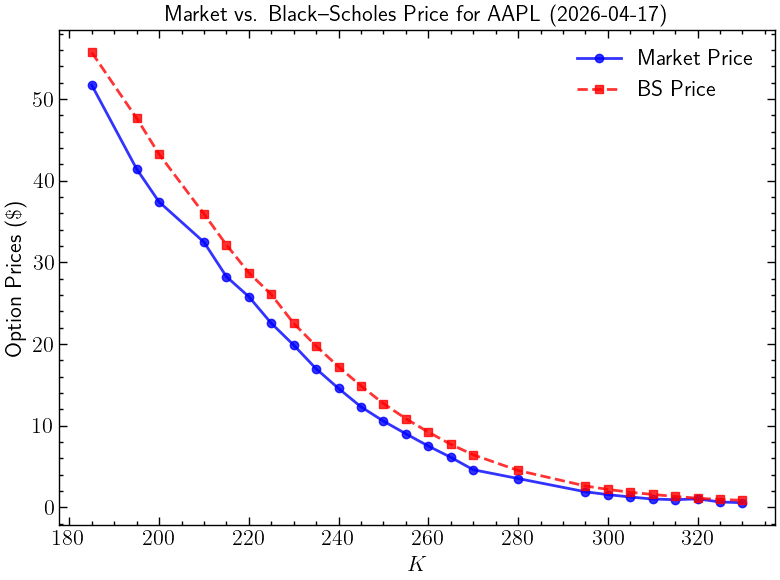

In [157]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science', 'notebook', 'grid'])
plt.rcParams['text.usetex'] = True
plt.figure(figsize=(8,6))
plt.plot(df["Strike"], df["MarketPrice"], 'o-', color = 'blue', label="Market Price", alpha=0.8)
plt.plot(df["Strike"], df["BS_Price"], 's--', color = 'red', label="BS Price", alpha=0.8)
plt.xlabel("$K$")
plt.ylabel("Option Prices ($\$$)")
plt.title(f"Market vs. Black–Scholes Price for {ticker} ({expiry})")
plt.legend(frameon = False)
plt.grid(False)
plt.tight_layout()
plt.show()

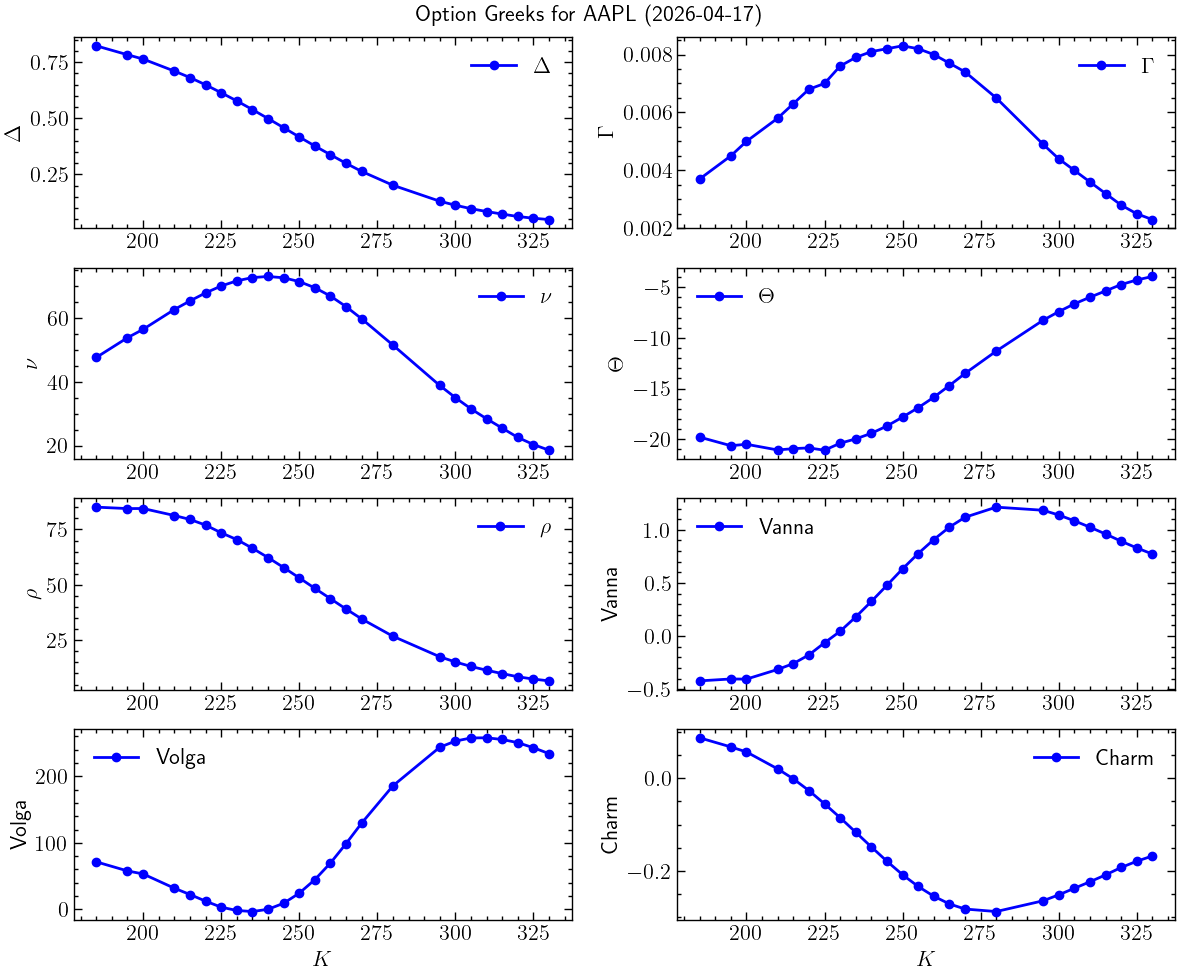

In [158]:
# Mapping of Greeks to LaTeX symbols
greek_labels = {
    "Delta": r"$\Delta$",
    "Gamma": r"$\Gamma$",
    "Vega": r"$\nu$",
    "Theta": r"$\Theta$",
    "Rho": r"$\rho$",
    "Vanna": r"$\text{Vanna}$",
    "Volga": r"$\text{Volga}$",
    "Charm": r"$\text{Charm}$"
}

# Plotting the Greeks
fig, axes = plt.subplots(4, 2, figsize=(12,10))
greeks = ["Delta","Gamma","Vega","Theta","Rho", "Vanna", "Volga", "Charm"]

for i, greek in enumerate(greeks):
    ax = axes[i//2, i%2]
    ax.plot(df["Strike"], df[greek], 'o-', color = 'blue', label=greek_labels[greek])

    # Only show xlabel for the last row
    if i // 2 == 3:   # last row (row index 3)
        ax.set_xlabel("$K$")  # Strike
    ax.set_ylabel(greek_labels[greek])
    ax.grid(False)
    ax.legend(frameon=False)

fig.suptitle(f"Option Greeks for {ticker} ({expiry})", fontsize=16)
plt.tight_layout()
plt.show()


## **Reflections**

### **1. Assumptions vs. Real World**

| BS Assumption | Reality / Limitation | Implications |
|---------------|-------------------|--------------|
| Constant volatility | Volatility changes over time (stochastic volatility) | Cannot capture the volatility smile or skew observed in markets |
| Constant risk-free rate | Interest rates fluctuate | Prices may be inaccurate for long-dated options |
| Lognormal distribution of asset returns | Actual returns have fat tails and skewness | Underestimates probability of extreme events (crashes or rallies) |
| No dividends / continuous dividends | Many stocks pay discrete dividends | Needs adjustment to account for dividend effects |
| Frictionless markets | Real markets have transaction costs and bid-ask spreads | Perfect hedging is impossible; Greeks may not translate perfectly into risk management |
| Continuous hedging is possible | Hedging occurs discretely in reality | Assumes ideal replication of payoffs, which is impractical |
| European-style exercise | Many options are American (early exercise allowed) | BS cannot price American options accurately without modification |

---

### **2. Real-World Evidence**
- Implied volatilities vary with strike price → volatility smile/skew exists.
- Market option prices often **deviate from BS predictions**, especially for deep OTM or long-dated options.
- Extreme market events lead to large **model errors** because BS underestimates tail risk.

---

### **3. Common Extensions**

| Limitation | Extension / Model |
|------------|-----------------|
| Stochastic volatility | Heston model, SABR model |
| Volatility smile / skew | Local volatility models (Dupire), stochastic volatility models |
| Jump risk / fat tails | Merton jump-diffusion model, Kou double-exponential jump model |
| American-style options | Binomial/trinomial tree models, finite-difference PDE methods |
| Discrete dividends | Adjusted BS with present value of dividends, or jump-diffusion for dividends |
| Interest rate uncertainty | Hull–White model for stochastic rates, Black–Derman–Toy model |

---

Going forward, I will build up the models incorporating the extensions and investigate how they improve the pricing of options.


### **4. Key Takeaways**
- BS model is **simple, elegant, and widely used** in practice.
- Main limitations come from **real-world complexities**: stochastic volatility, jumps, transaction costs, discrete dividends, and American features.
- Extensions like **Heston, SABR, Dupire, Merton jump-diffusion, and lattice models** improve accuracy but **increase complexity**.
- BS is often used as a **baseline**, then more advanced models are calibrated to market prices.


# **References**

- Black, F., & Scholes, M. (1973). The pricing of options and corporate liabilities. *Journal of Political Economy*, 81(3), 637–654.

- Merton, R. C. (1973). Theory of rational option pricing. *Bell Journal of Economics and Management Science*, 4(1), 141–183.

- Hull, J. C. (2017). *Options, futures, and other derivatives (11th ed.)*. Pearson.

- Wilmott, P. (2006). *Paul Wilmott introduces quantitative finance (2nd ed.)*. Wiley.

- Haug, E. G. (2007). *The complete guide to option pricing formulas (2nd ed.)*. McGraw-Hill.

- Shreve, S. E. (2004). *Stochastic calculus for finance II: Continuous-time models*. Springer.




<span style="font-family:'cursive'; font-size:10px;">
&nbsp;<strong>Disclaimer:</strong> <br>  
The content and code in this notebook are intended for educational and illustrative purposes only. Option pricing involves risk, and the models presented here rely on assumptions that may not fully reflect real market conditions. Users should exercise caution, perform their own research, and consult a qualified financial professional before making any investment or trading decisions.&nbsp;
</span>